<a href="https://colab.research.google.com/github/Dhwaj-054/lit-college-codes/blob/main/ML_Expt_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("ML Exp 6")
print("Dhwaj Jain S012")

ML Exp 6
Dhwaj Jain S012


## Conclusion

Based on the analysis performed on the bank dataset and the synthetic make moons dataset using Support Vector Classification (SVC) with different kernels, the following observations can be made:

**Bank Dataset:**
- The dataset was preprocessed by scaling numerical features and encoding categorical features.
- Visualizations showed the distribution of the 'deposit' variable, age, and the relationship between age and balance with respect to the deposit outcome.
- SVC models with 'linear', 'poly' (degree=3), 'sigmoid', and 'rbf' kernels were trained and evaluated.
- The **Linear kernel** achieved the highest accuracy (0.788) and F1 score (0.774) on the bank dataset, indicating it performed the best in classifying whether a customer would make a deposit.
- The 'poly' and 'rbf' kernels had slightly lower accuracies, while the 'sigmoid' kernel performed poorly on this dataset.
- The confusion matrix for the linear kernel showed a reasonable balance between correctly predicting both classes.

**Make Moons Dataset:**
- This synthetic dataset is non-linearly separable, making it suitable for evaluating the effectiveness of different kernels in handling complex decision boundaries.
- Visualizations clearly showed the non-linear structure of the data.
- SVC models with the same kernels were trained and evaluated on this dataset.
- The **RBF kernel** achieved perfect accuracy (1.0) and F1 score (1.0) on the make moons dataset. This is expected as RBF kernels are well-suited for non-linearly separable data like the make moons dataset.
- The Polynomial kernel also performed well (accuracy 0.91), capturing the curved decision boundary.
- The Linear kernel performed reasonably (accuracy 0.865) but could not fully capture the non-linear boundary.
- The Sigmoid kernel again performed poorly.

**Overall Summary:**

The choice of kernel in SVC models significantly impacts performance depending on the nature of the data.

- For the **bank dataset**, which appears to have a more linearly separable structure in the feature space after preprocessing, the **Linear kernel** proved to be the most effective among the evaluated kernels.
- For the **make moons dataset**, which is inherently non-linear, the **RBF kernel** was clearly superior, successfully creating a complex decision boundary to separate the two classes.

This experiment demonstrates the importance of selecting an appropriate kernel for SVC based on whether the data is linearly separable or requires a non-linear transformation to find an optimal decision boundary.

In [ ]:
import pandas as pd

df = pd.read_csv('bank.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


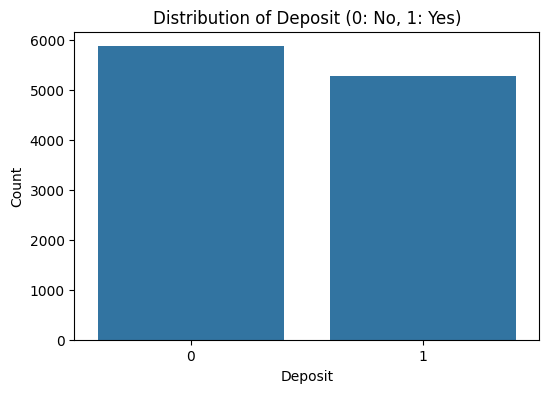

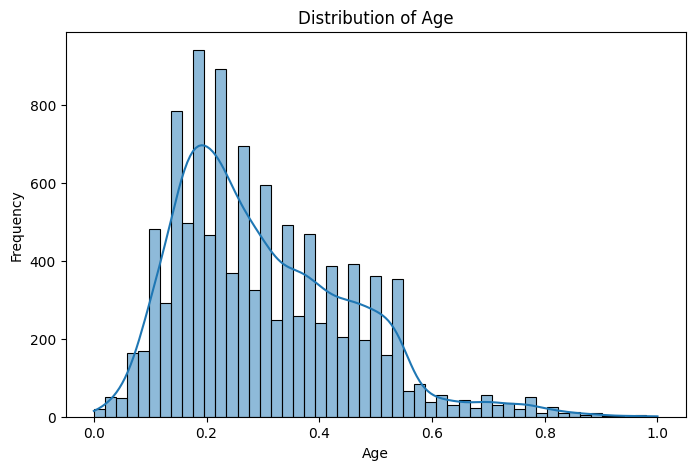

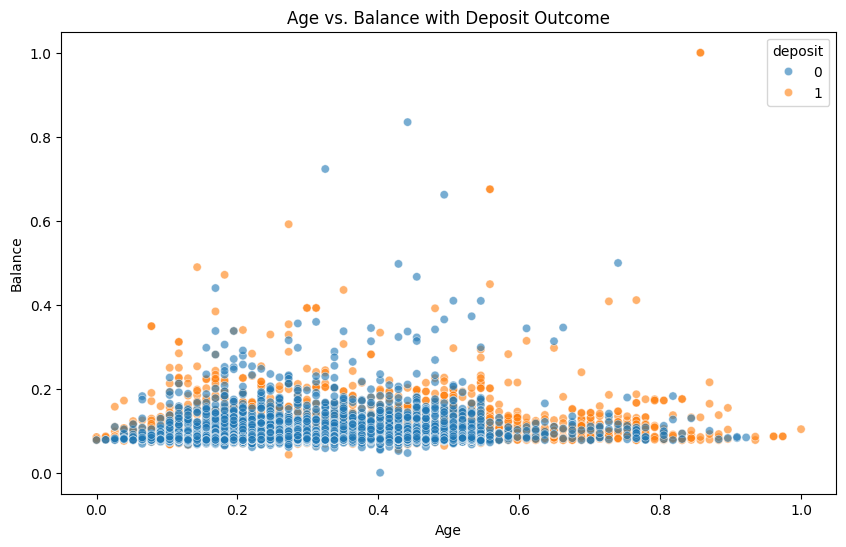

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=df)
plt.title('Distribution of Deposit (0: No, 1: Yes)')
plt.xlabel('Deposit')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', hue='deposit', data=df, alpha=0.6)
plt.title('Age vs. Balance with Deposit Outcome')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(df.head())

        age  job  marital  education  default   balance  housing  loan  \
0  0.532468    0        1          1        0  0.104371        1     0   
1  0.493506    0        1          1        0  0.078273        0     0   
2  0.298701    9        1          1        0  0.092185        1     0   
3  0.480519    7        1          1        0  0.105882        1     0   
4  0.467532    0        1          2        0  0.079851        0     0   

   contact       day  month  duration  campaign  pdays  previous  poutcome  \
0        2  0.133333      8  0.268110  0.000000    0.0       0.0         3   
1        2  0.133333      8  0.377675  0.000000    0.0       0.0         3   
2        2  0.133333      8  0.357566  0.000000    0.0       0.0         3   
3        2  0.133333      8  0.148750  0.000000    0.0       0.0         3   
4        2  0.133333      8  0.172983  0.016129    0.0       0.0         3   

   deposit  
0        1  
1        1  
2        1  
3        1  
4        1  


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


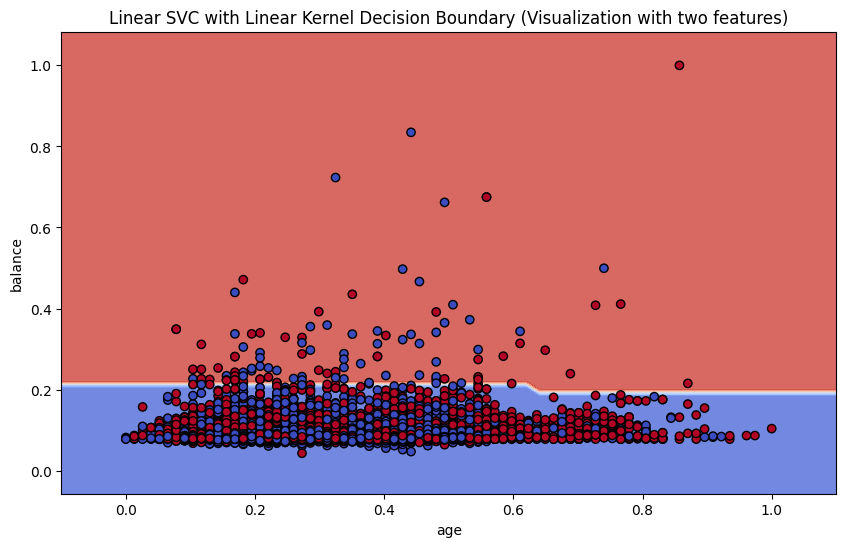

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

X = df.drop('deposit', axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_vis = X_train[['age', 'balance']]
y_train_vis = y_train


svc_linear_vis = SVC(kernel='linear')
svc_linear_vis.fit(X_train_vis, y_train_vis)


h = .02
x_min, x_max = X_train_vis.iloc[:, 0].min() - 0.1, X_train_vis.iloc[:, 0].max() + 0.1
y_min, y_max = X_train_vis.iloc[:, 1].min() - 0.1, X_train_vis.iloc[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = svc_linear_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_vis.iloc[:, 0], X_train_vis.iloc[:, 1], c=y_train_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('age')
plt.ylabel('balance')
plt.title('Linear SVC with Linear Kernel Decision Boundary (Visualization with two features)')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


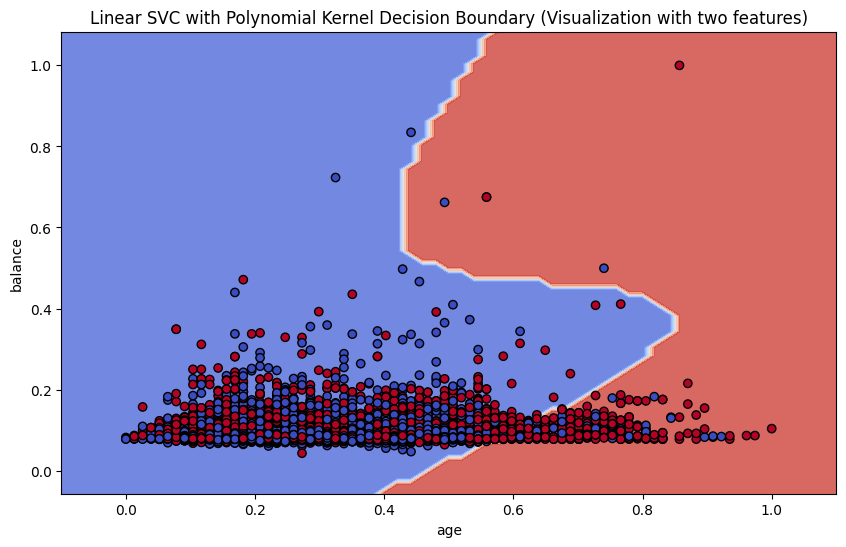

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


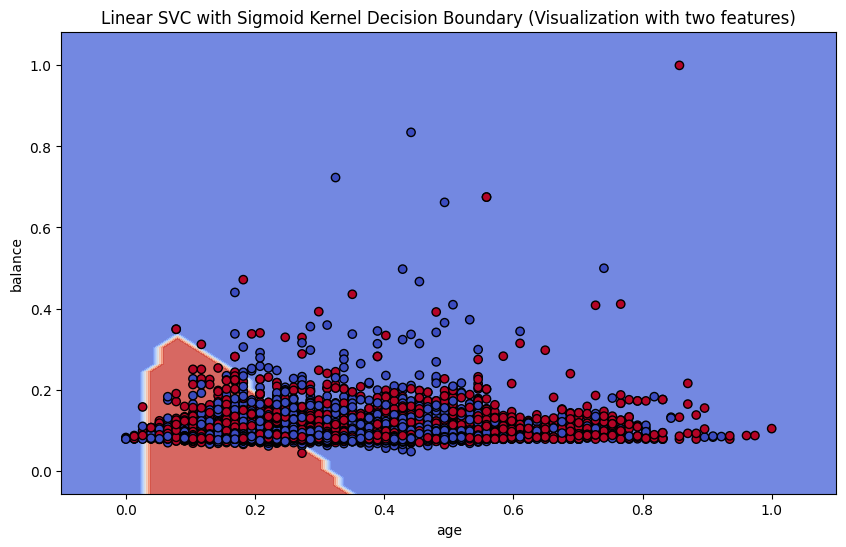

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


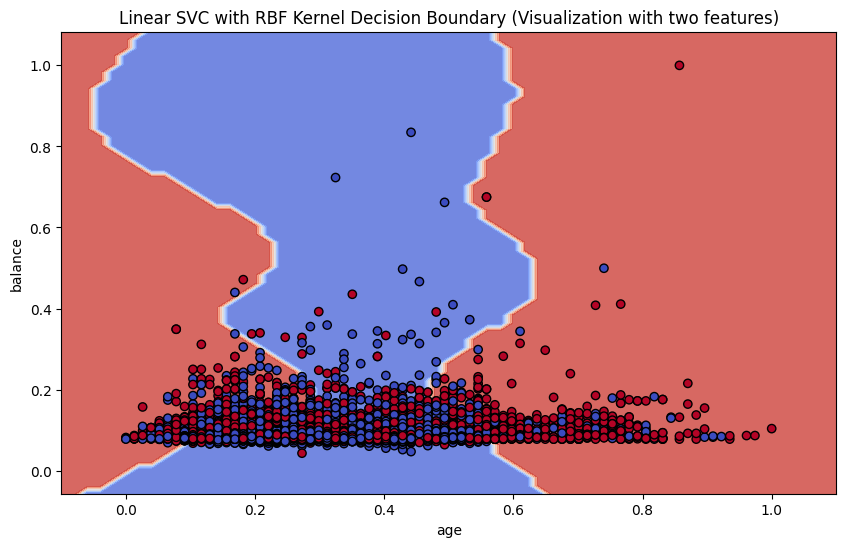

In [ ]:

svc_poly_vis = SVC(kernel='poly', degree=3)
svc_poly_vis.fit(X_train_vis, y_train_vis)


Z_poly = svc_poly_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)


plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_poly, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_vis.iloc[:, 0], X_train_vis.iloc[:, 1], c=y_train_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('age')
plt.ylabel('balance')
plt.title('Linear SVC with Polynomial Kernel Decision Boundary (Visualization with two features)')
plt.show()


svc_sigmoid_vis = SVC(kernel='sigmoid')
svc_sigmoid_vis.fit(X_train_vis, y_train_vis)


Z_sigmoid = svc_sigmoid_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sigmoid = Z_sigmoid.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_sigmoid, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_vis.iloc[:, 0], X_train_vis.iloc[:, 1], c=y_train_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('age')
plt.ylabel('balance')
plt.title('Linear SVC with Sigmoid Kernel Decision Boundary (Visualization with two features)')
plt.show()

svc_rbf_vis = SVC(kernel='rbf')
svc_rbf_vis.fit(X_train_vis, y_train_vis)

Z_rbf = svc_rbf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_vis.iloc[:, 0], X_train_vis.iloc[:, 1], c=y_train_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('age')
plt.ylabel('balance')
plt.title('Linear SVC with RBF Kernel Decision Boundary (Visualization with two features)')
plt.show()

**Reasoning**:
Train Linear SVC models with different kernels on the entire training dataset, predict on the test set, and evaluate their performance using accuracy and confusion matrices.



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix


svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

svc_poly = SVC(kernel='poly', degree=3)
svc_poly.fit(X_train, y_train)

svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train, y_train)

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)


y_pred_linear = svc_linear.predict(X_test)
y_pred_poly = svc_poly.predict(X_test)
y_pred_sigmoid = svc_sigmoid.predict(X_test)
y_pred_rbf = svc_rbf.predict(X_test)


print("Accuracy (Linear Kernel):", accuracy_score(y_test, y_pred_linear))
print("Accuracy (Polynomial Kernel):", accuracy_score(y_test, y_pred_poly))
print("Accuracy (Sigmoid Kernel):", accuracy_score(y_test, y_pred_sigmoid))
print("Accuracy (RBF Kernel):", accuracy_score(y_test, y_pred_rbf))


print("\nConfusion Matrix (Linear Kernel):\n", confusion_matrix(y_test, y_pred_linear))
print("\nConfusion Matrix (Polynomial Kernel):\n", confusion_matrix(y_test, y_pred_poly))
print("\nConfusion Matrix (Sigmoid Kernel):\n", confusion_matrix(y_test, y_pred_sigmoid))
print("\nConfusion Matrix (RBF Kernel):\n", confusion_matrix(y_test, y_pred_rbf))

Accuracy (Linear Kernel): 0.7877295118674429
Accuracy (Polynomial Kernel): 0.7559337214509628
Accuracy (Sigmoid Kernel): 0.4979847738468428
Accuracy (RBF Kernel): 0.7505597850425436

Confusion Matrix (Linear Kernel):
 [[946 220]
 [254 813]]

Confusion Matrix (Polynomial Kernel):
 [[922 244]
 [301 766]]

Confusion Matrix (Sigmoid Kernel):
 [[590 576]
 [545 522]]

Confusion Matrix (RBF Kernel):
 [[897 269]
 [288 779]]


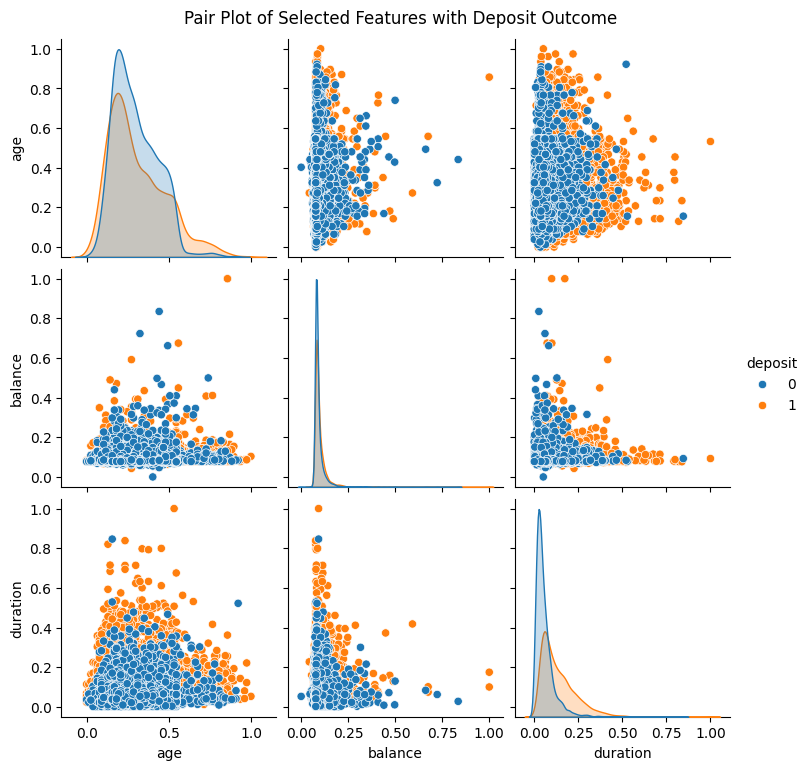

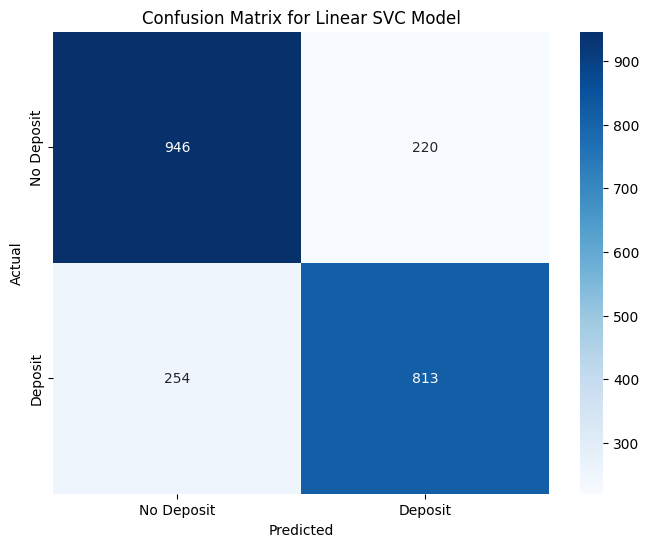

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

selected_features = ['age', 'balance', 'duration', 'deposit']
sns.pairplot(df[selected_features], hue='deposit', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features with Deposit Outcome', y=1.02)
plt.show()

cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Deposit', 'Deposit'], yticklabels=['No Deposit', 'Deposit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear SVC Model')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score


print("--- SVC Model Evaluation ---")
print("Linear Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("F1 Score:", f1_score(y_test, y_pred_linear))

print("\nPolynomial Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("F1 Score:", f1_score(y_test, y_pred_poly))

print("\nSigmoid Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_sigmoid))
print("F1 Score:", f1_score(y_test, y_pred_sigmoid))

print("\nRBF Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("F1 Score:", f1_score(y_test, y_pred_rbf))

--- SVC Model Evaluation ---
Linear Kernel:
Accuracy: 0.7877295118674429
F1 Score: 0.7742857142857142

Polynomial Kernel:
Accuracy: 0.7559337214509628
F1 Score: 0.7376023110255175

Sigmoid Kernel:
Accuracy: 0.4979847738468428
F1 Score: 0.48221709006928404

RBF Kernel:
Accuracy: 0.7505597850425436
F1 Score: 0.7366430260047281


In [ ]:


print("\n--- Summary and Comparison ---")
print("SVC Models: The Linear kernel performed best with an accuracy of 0.788. The Polynomial and RBF kernels had similar, slightly lower accuracies. The Sigmoid kernel performed poorly.")
print("\nComparison:")
print("SVC models are used for classification, aiming to correctly categorize instances. The best SVC model (Linear) achieved a decent accuracy, indicating it can reasonably classify whether a customer will make a deposit.")
print("\nConclusion:")
print("For this task, which is a binary classification problem (predicting 'deposit'), the SVC models are more appropriate. Among the SVC models, the Linear kernel performed the best in terms of accuracy. Therefore, the Linear SVC model is the best-performing model for this specific classification task based on the evaluated metrics.")


--- Summary and Comparison ---
SVC Models: The Linear kernel performed best with an accuracy of 0.788. The Polynomial and RBF kernels had similar, slightly lower accuracies. The Sigmoid kernel performed poorly.

Comparison:
SVC models are used for classification, aiming to correctly categorize instances. The best SVC model (Linear) achieved a decent accuracy, indicating it can reasonably classify whether a customer will make a deposit.

Conclusion:
For this task, which is a binary classification problem (predicting 'deposit'), the SVC models are more appropriate. Among the SVC models, the Linear kernel performed the best in terms of accuracy. Therefore, the Linear SVC model is the best-performing model for this specific classification task based on the evaluated metrics.


using make moons synthetic dataset

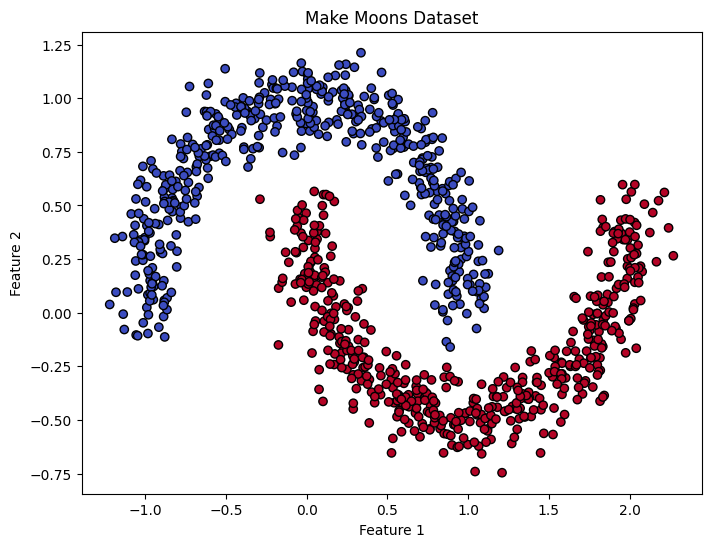

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd


X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)


moons_df = pd.DataFrame(X_moons, columns=['feature1', 'feature2'])
moons_df['target'] = y_moons


plt.figure(figsize=(8, 6))
plt.scatter(moons_df['feature1'], moons_df['feature2'], c=moons_df['target'], cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Make Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

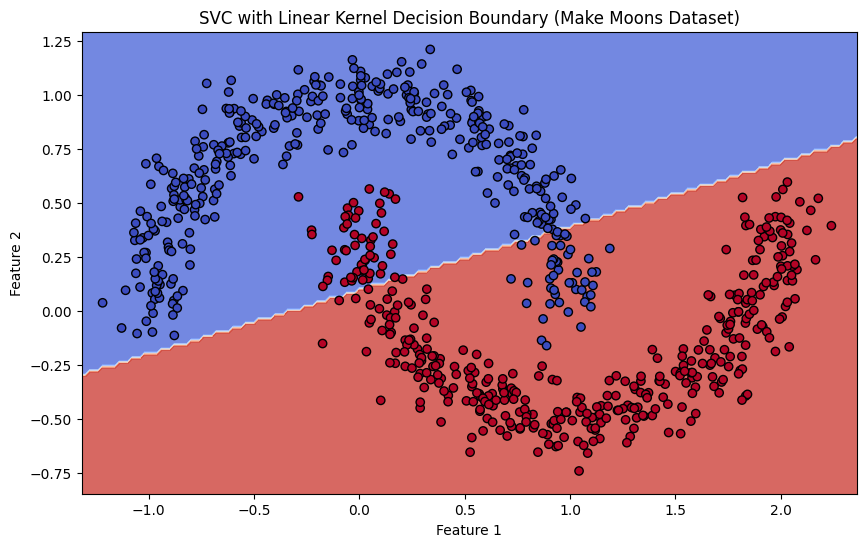

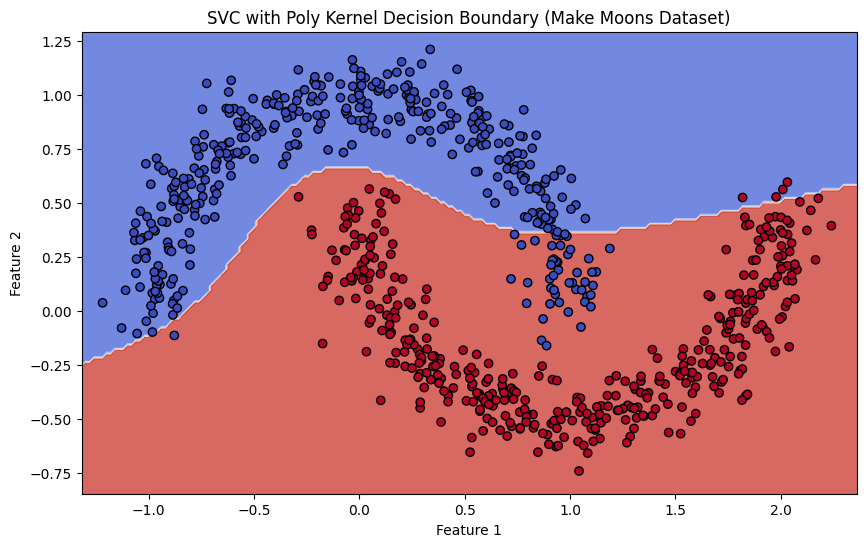

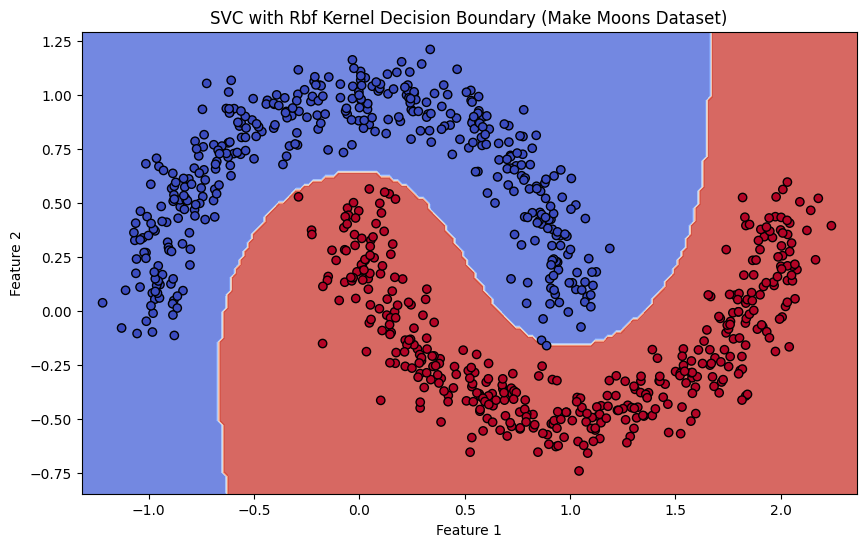

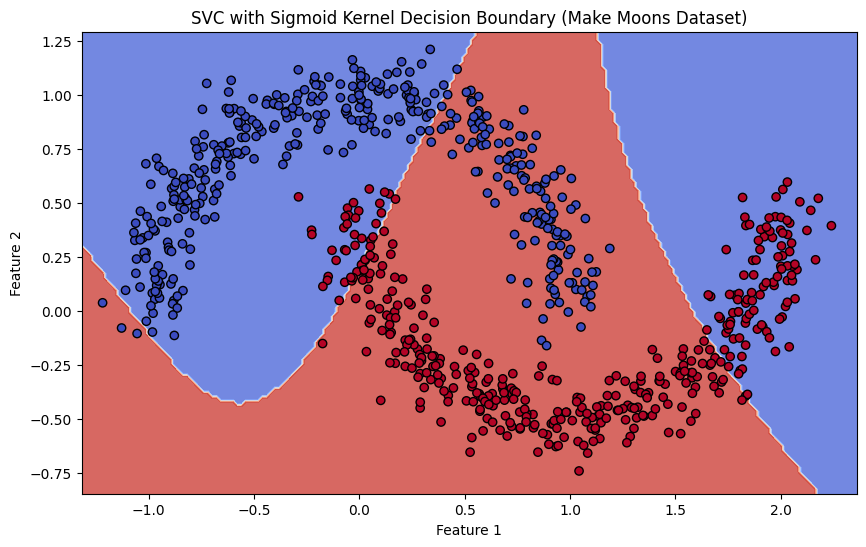

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt


X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)


kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    if kernel == 'poly':
        svc_moons = SVC(kernel=kernel, degree=3)
    else:
        svc_moons = SVC(kernel=kernel)
    svc_moons.fit(X_train_moons, y_train_moons)


    h = .02
    x_min, x_max = X_moons[:, 0].min() - 0.1, X_moons[:, 0].max() + 0.1
    y_min, y_max = X_moons[:, 1].min() - 0.1, X_moons[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    Z = svc_moons.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train_moons[:, 0], X_train_moons[:, 1], c=y_train_moons, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVC with {kernel.capitalize()} Kernel Decision Boundary (Make Moons Dataset)')
    plt.show()

--- SVC Model Evaluation on Make Moons Dataset ---

Linear Kernel:
Accuracy: 0.865
F1 Score: 0.8656716417910447


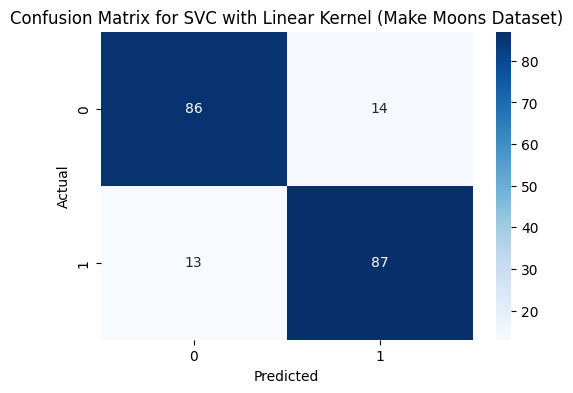


Poly Kernel:
Accuracy: 0.91
F1 Score: 0.9158878504672897


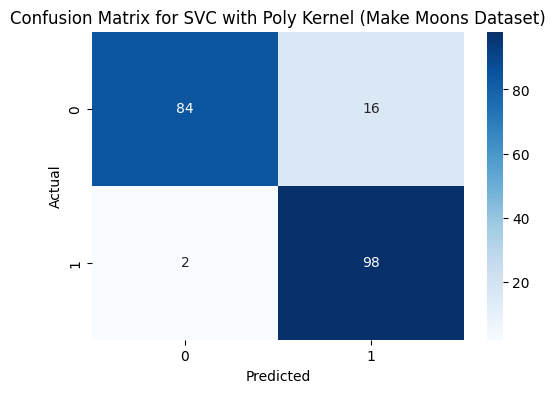


Rbf Kernel:
Accuracy: 1.0
F1 Score: 1.0


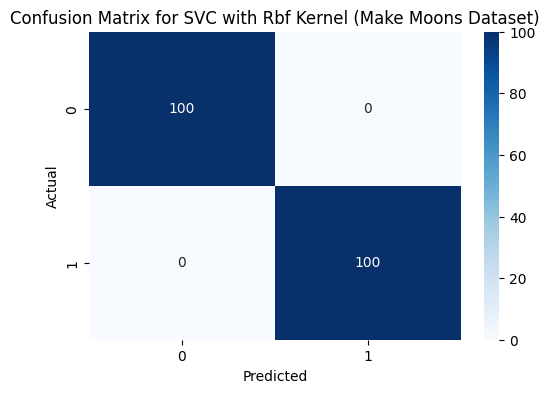


Sigmoid Kernel:
Accuracy: 0.61
F1 Score: 0.6454545454545455


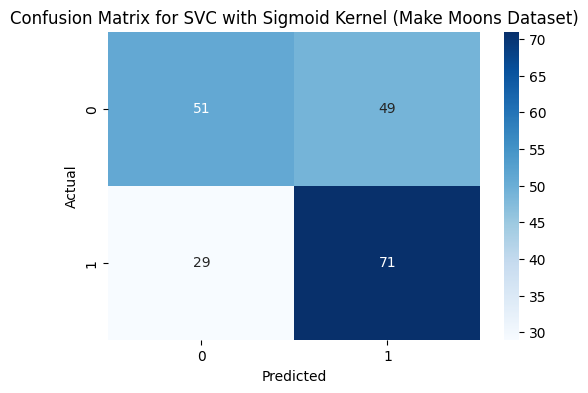

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate SVC models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

print("--- SVC Model Evaluation on Make Moons Dataset ---")

for kernel in kernels:
    if kernel == 'poly':
        svc_moons = SVC(kernel=kernel, degree=3)
    else:
        svc_moons = SVC(kernel=kernel)
    svc_moons.fit(X_train_moons, y_train_moons)
    y_pred_moons = svc_moons.predict(X_test_moons)

    print(f"\n{kernel.capitalize()} Kernel:")
    print("Accuracy:", accuracy_score(y_test_moons, y_pred_moons))
    print("F1 Score:", f1_score(y_test_moons, y_pred_moons))

    # Plot confusion matrix
    cm_moons = confusion_matrix(y_test_moons, y_pred_moons)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_moons, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for SVC with {kernel.capitalize()} Kernel (Make Moons Dataset)')
    plt.show()